In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
%matplotlib inline

In [42]:
df = pd.read_csv('train_E6oV3lV.csv')

In [43]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [44]:
df.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


In [45]:
count_class_0, count_class_1 = df['label'].value_counts()

In [46]:
df_class_0 =  df.query('label==0')
df_class_1 =  df.query('label==1')

In [47]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1],ignore_index=True ,axis=0)

In [48]:
df_under.shape

(4484, 3)

In [49]:
df_under.groupby('label').count()

,id,tweet
label,,
0,2242,2242
1,2242,2242


In [50]:
X = df_under['tweet']
Y = df_under['label']
Y_org = Y

In [51]:
X[34]

'lights on and now lights off.. thank you @user for the last 2.5 weeks!! #vividsydney   '

In [52]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', split=' ', lower=True, char_level=False, oov_token=None)
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)

# add padding
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=400)

In [54]:
max(df['tweet'], key=len)

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 95)
pca.fit(X)
X = pca.transform(X);

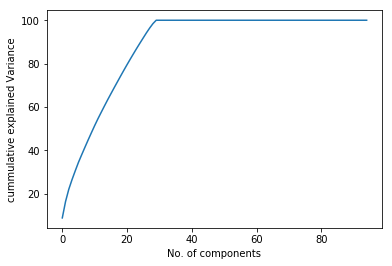

In [57]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 42)

In [59]:
from keras.models import Sequential 

In [60]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [61]:
classifier = Sequential()
classifier.add(LSTM(units=40, activation='relu',return_sequences= True, input_shape=(None, 95)))
classifier.add(Dropout(rate=0.3))

In [62]:
classifier.add(LSTM(units=20, return_sequences= True,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(LSTM(units=20,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units = 2, activation='sigmoid'))

In [63]:
classifier.compile(optimizer='rmsprop',metrics=['accuracy'],loss='binary_crossentropy')

In [64]:
from sklearn.preprocessing import OneHotEncoder
y_e = OneHotEncoder()
Y_train_org = Y_train
Y_test_org = Y_test
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
y_e.fit(Y_train)
Y_train = y_e.transform(Y_train)
Y_test = y_e.transform(Y_test)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [65]:
X_train_lstm = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0],1 ,X_test.shape[1]))
import tensorflow as tf
with tf.device('/gpu:0'):
    checker = classifier.fit(X_train_lstm, Y_train, batch_size=32, epochs=200, validation_data = (X_test_lstm, Y_test))


Train on 3587 samples, validate on 897 samples
Epoch 1/200
3587/3587 [==============================] - 4s 1ms/step - loss: 0.6924 - acc: 0.5290 - val_loss: 0.6900 - val_acc: 0.6750
Epoch 2/200
3587/3587 [==============================] - 2s 445us/step - loss: 0.6826 - acc: 0.6620 - val_loss: 0.6707 - val_acc: 0.7007
Epoch 3/200
3587/3587 [==============================] - 2s 441us/step - loss: 0.6594 - acc: 0.6862 - val_loss: 0.6472 - val_acc: 0.7051
Epoch 4/200
3587/3587 [==============================] - 2s 423us/step - loss: 0.6363 - acc: 0.6905 - val_loss: 0.6374 - val_acc: 0.7090
Epoch 5/200
3587/3587 [==============================] - 2s 436us/step - loss: 0.6332 - acc: 0.6908 - val_loss: 0.6375 - val_acc: 0.7135
Epoch 6/200
3587/3587 [==============================] - 2s 429us/step - loss: 0.6197 - acc: 0.6977 - val_loss: 0.6356 - val_acc: 0.7124
Epoch 7/200
3587/3587 [==============================] - 1s 382us/step - loss: 0.6148 - acc: 0.6982 - val_loss: 0.6338 - val_acc: 0.7

3587/3587 [==============================] - 1s 372us/step - loss: 0.5219 - acc: 0.7682 - val_loss: 0.5764 - val_acc: 0.7447
Epoch 61/200
3587/3587 [==============================] - 1s 348us/step - loss: 0.5175 - acc: 0.7738 - val_loss: 0.5784 - val_acc: 0.7492
Epoch 62/200
3587/3587 [==============================] - 1s 376us/step - loss: 0.5102 - acc: 0.7763 - val_loss: 0.5729 - val_acc: 0.7447
Epoch 63/200
3587/3587 [==============================] - 1s 346us/step - loss: 0.5169 - acc: 0.7692 - val_loss: 0.5792 - val_acc: 0.7397
Epoch 64/200
3587/3587 [==============================] - 1s 352us/step - loss: 0.5072 - acc: 0.7788 - val_loss: 0.5804 - val_acc: 0.7425
Epoch 65/200
3587/3587 [==============================] - 1s 370us/step - loss: 0.5054 - acc: 0.7781 - val_loss: 0.5811 - val_acc: 0.7447
Epoch 66/200
3587/3587 [==============================] - 1s 354us/step - loss: 0.5068 - acc: 0.7761 - val_loss: 0.5770 - val_acc: 0.7486
Epoch 67/200
3587/3587 [=======================

3587/3587 [==============================] - 1s 338us/step - loss: 0.4620 - acc: 0.8009 - val_loss: 0.6064 - val_acc: 0.7447
Epoch 120/200
3587/3587 [==============================] - 1s 336us/step - loss: 0.4494 - acc: 0.8089 - val_loss: 0.5993 - val_acc: 0.7464
Epoch 121/200
3587/3587 [==============================] - 1s 336us/step - loss: 0.4614 - acc: 0.8018 - val_loss: 0.6154 - val_acc: 0.7453
Epoch 122/200
3587/3587 [==============================] - 1s 335us/step - loss: 0.4627 - acc: 0.7986 - val_loss: 0.5949 - val_acc: 0.7469
Epoch 123/200
3587/3587 [==============================] - 1s 337us/step - loss: 0.4598 - acc: 0.8004 - val_loss: 0.5882 - val_acc: 0.7475
Epoch 124/200
3587/3587 [==============================] - 1s 337us/step - loss: 0.4577 - acc: 0.8069 - val_loss: 0.6004 - val_acc: 0.7469
Epoch 125/200
3587/3587 [==============================] - 1s 337us/step - loss: 0.4621 - acc: 0.7996 - val_loss: 0.6135 - val_acc: 0.7514
Epoch 126/200
3587/3587 [================

3587/3587 [==============================] - 1s 353us/step - loss: 0.4132 - acc: 0.8163 - val_loss: 0.6234 - val_acc: 0.7648
Epoch 179/200
3587/3587 [==============================] - 1s 345us/step - loss: 0.4187 - acc: 0.8198 - val_loss: 0.5998 - val_acc: 0.7637
Epoch 180/200
3587/3587 [==============================] - 1s 352us/step - loss: 0.4024 - acc: 0.8276 - val_loss: 0.6336 - val_acc: 0.7625
Epoch 181/200
3587/3587 [==============================] - 1s 349us/step - loss: 0.4100 - acc: 0.8220 - val_loss: 0.6122 - val_acc: 0.7614
Epoch 182/200
3587/3587 [==============================] - 1s 351us/step - loss: 0.4026 - acc: 0.8270 - val_loss: 0.6296 - val_acc: 0.7659
Epoch 183/200
3587/3587 [==============================] - 1s 355us/step - loss: 0.4156 - acc: 0.8251 - val_loss: 0.6128 - val_acc: 0.7581
Epoch 184/200
3587/3587 [==============================] - 1s 348us/step - loss: 0.4084 - acc: 0.8219 - val_loss: 0.6242 - val_acc: 0.7614
Epoch 185/200
3587/3587 [================

In [66]:
Y_pred_test_label = classifier.predict(X_test_lstm)
y_pred_test=np.argmax(Y_pred_test_label,axis =1)
y_pred_test
Y_pred_train_label = classifier.predict(X_train_lstm)
y_pred_train = np.argmax(Y_pred_train_label,axis=1)
Y_test_true = Y_test_org.astype(np.int)
Y_train_true = Y_train_org.astype(np.int)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_true,y_pred_test))

             precision    recall  f1-score   support

          0       0.78      0.73      0.75       443
          1       0.75      0.80      0.77       454

avg / total       0.77      0.76      0.76       897



In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
### for softmax function
print("TRAIN:  \n",confusion_matrix(y_pred_train,Y_train_true))
print("\nTest:  \n",confusion_matrix(y_pred_test,Y_test_true))

TRAIN:  
 [[1423  101]
 [ 376 1687]]

Test:  
 [[324  92]
 [119 362]]


In [70]:
print(classification_report(Y_train_true,y_pred_train))

             precision    recall  f1-score   support

          0       0.93      0.79      0.86      1799
          1       0.82      0.94      0.88      1788

avg / total       0.88      0.87      0.87      3587



In [71]:
classifier.save("rnn_classifier.h5")

In [72]:
from keras.models import load_model
new_model = load_model("rnn_classifier.h5")

In [73]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, None, 40)          21760     
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 40)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 20)          4880      
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 20)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total para

In [74]:
new_model.get_weights()

[array([[-0.14559674,  0.7160488 ,  0.13177043, ..., -0.3410427 ,
          0.25402558, -0.365889  ],
        [ 0.43805093, -0.03930505,  0.42130852, ...,  0.01915116,
          0.46031323,  0.26138148],
        [ 0.0038806 , -0.71913564,  0.2839417 , ...,  0.17708573,
         -0.30368337,  0.2878247 ],
        ...,
        [-0.10714342,  0.11328012, -0.09651805, ...,  0.04101078,
         -0.02902809,  0.13805145],
        [-0.08265503,  0.01472561, -0.12156597, ...,  0.02105242,
         -0.11887933, -0.06857432],
        [ 0.12370333, -0.09113126,  0.003426  , ...,  0.03459573,
         -0.0954856 ,  0.11739311]], dtype=float32),
 array([[ 0.07421079,  0.04894492, -0.09644005, ..., -0.01759761,
         -0.04478638,  0.19051749],
        [-0.04148018,  0.02589066, -0.03653965, ...,  0.00762378,
         -0.0292593 ,  0.00283599],
        [-0.03455735, -0.07841709,  0.16490877, ..., -0.12657033,
         -0.02161739,  0.03423002],
        ...,
        [ 0.19854218,  0.00813805,  0.0

In [75]:
new_model.optimizer

In [76]:
new_model.predict(X_train_lstm)

array([[0.3660645 , 0.6349361 ],
       [0.0431054 , 0.9568307 ],
       [0.8538095 , 0.14581214],
       ...,
       [0.14776681, 0.8518005 ],
       [0.19093817, 0.80888367],
       [0.99290085, 0.00700216]], dtype=float32)